In [1]:
import datetime
from datetime import datetime
print("Last Updated:", str(datetime.today()))

Last Updated: 2025-02-13 03:33:05.043321


In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#pip install networkx
import networkx as nx

## Creating Network Graphs

In [4]:
# initialize a new graph
G = nx.Graph()

In [5]:
## Nodes are entities of interest (ex. brain region, person, article, decision, etc)

In [6]:
# add nodes (individually)

G.add_node('A')
G.add_node('B')
G.add_node('C')

# add multiple nodes
G.add_nodes_from(['D','E','F'])

In [7]:
## edges are connections between nodes

In [8]:
# add edges
G.add_edge('A','B')
G.add_edge('C','D')

# add multiple edges
G.add_edges_from([('A','B'),('A','E'),('F','C')])

In [9]:
# inspect
print("Nodes:", G.nodes())

print("Edges", G.edges())

Nodes: ['A', 'B', 'C', 'D', 'E', 'F']
Edges [('A', 'B'), ('A', 'E'), ('C', 'D'), ('C', 'F')]


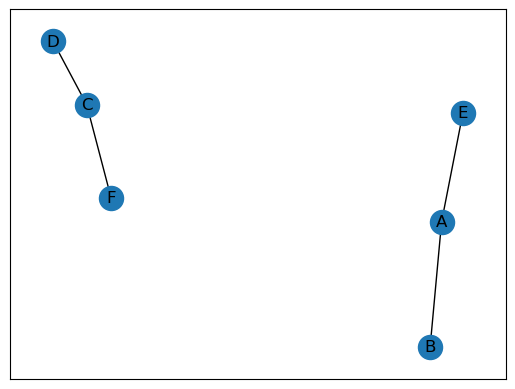

In [10]:
nx.draw_networkx(G)

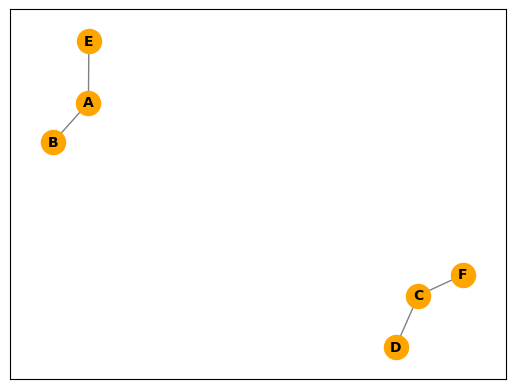

In [11]:
# apply formatting to the plot
nx.draw_networkx(G, with_labels=True,
       #node_size=2000,
       node_color='orange',
       font_size = 10,
       font_weight='bold',
       edge_color='gray')

plt.show()

In [12]:
# find number of edges per each node
for node in G.nodes():
    
    degree_num = G.degree(node)
    print("Node:", node, "Degree",degree_num)

Node: A Degree 2
Node: B Degree 1
Node: C Degree 2
Node: D Degree 1
Node: E Degree 1
Node: F Degree 1


## Exercises

- Modify the graph to include direction of edges using networkx
- Modify the graph to include weight of edges
- Create a new subgraph
- Explore the shortest path (e.g. `nx.shortest_path()`) and what it represents
- BONUS: explore functional connectivity of brain regions and how you would create a graph

Refer to networkx documentation: https://networkx.org/

## Simulate Weather Graph

In [13]:
# initialize new graph
weather_network = nx.Graph()

In [14]:
# create data for cities and their corresponding temperatures
cities = ['Lilongwe', 'Dedza','Blantyre','Balaka','Mzimba','Salima']
temp = [24, 10, 40, 15, 16, 17]

# create a dictionary that pairs city with temperature
city_temps = dict(zip(cities, temp))
#city_temps['Lilongwe']

In [15]:
# add cities as nodes
for city in cities:
    weather_network.add_node(city)

In [16]:
# for each city in the dictionary, calculate the similarity (difference in temp) for every other city
for city1 in city_temps.keys():
    for city2 in city_temps.keys():
        
        if city1 != city2:
            temp_similarity = abs(city_temps[city1] - city_temps[city2])
            #print(temp_similarity)
            
            # add the city pairs as the connection and similarity measure as the strength of the connection
            weather_network.add_edge(city1, city2, weight=temp_similarity)

In [17]:
labels = nx.get_edge_attributes(weather_network,'weight')
labels;

In [18]:
print(weather_network) # inspect metadata for graph

Graph with 6 nodes and 15 edges


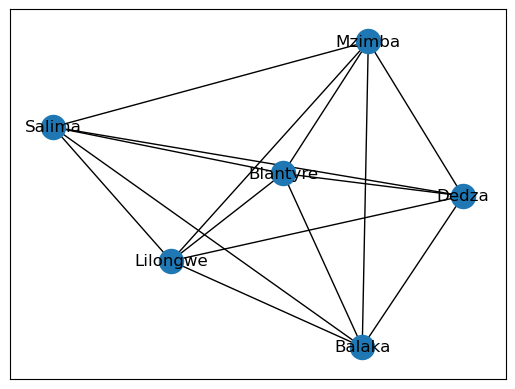

In [19]:
# plot the graph
pos = nx.spring_layout(weather_network)
nx.draw_networkx(weather_network)

